<a href="https://colab.research.google.com/github/Ketaki-conda/DataScience_BusinessAnalytics/blob/main/SignalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt

# frequency is the number of times a wave repeats in a second
frequency = 1000
num_samples = 48000

# The sampling rate of the analog to digital convert
sampling_rate = 48000.0
amplitude = 16000

In [2]:
file = "test.wav"
sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)] # divide by sampling to convert it to digital
nframes=num_samples 
comptype="NONE"
compname="not compressed"
nchannels=1
sampwidth=2
wav_file=wave.open(file, 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))
for s in sine_wave:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [4]:
 from IPython.display import Audio

In [5]:
Audio(data=file,autoplay=False)

In [3]:
frame_rate = 48000.0
infile = "test.wav"
num_samples = 48000
wav_file = wave.open(infile, 'r')
# reading the wave file. The wave readframes() function reads all the audio frames from a wave file. 
data = wav_file.readframes(num_samples)
wav_file.close()

In [6]:
data = struct.unpack('{n}h'.format(n=num_samples), data)

In [7]:
data = np.array(data)
data_fft = np.fft.fft(data)
frequencies = np.abs(data_fft)
# print("The frequency is {} Hz".format(np.argmax(frequencies)))

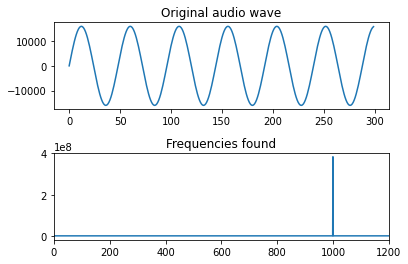

In [8]:
plt.subplot(2,1,1)
plt.plot(data[:300])
plt.title("Original audio wave")
plt.subplots_adjust(hspace=.5)
plt.subplot(2,1,2)
plt.plot(frequencies)
plt.title("Frequencies found")
plt.xlim(0,1200)

plt.show()

Cleaning a noisy sine wave

In [21]:
noisy_freq = 500 # The main frequency is a 1000Hz, and we will add a noise of 500Hz to it.
#We generate two sine waves, one for the signal and one for the noise, and convert them to numpy arrays.

sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
sine_noise = np.array(sine_noise)

# Adding them to create a noisy signal
combined_signal = sine_wave + sine_noise

In [22]:
newfile = "combined.wav"
for s in combined_signal:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [23]:
Audio(data=newfile,autoplay=False)

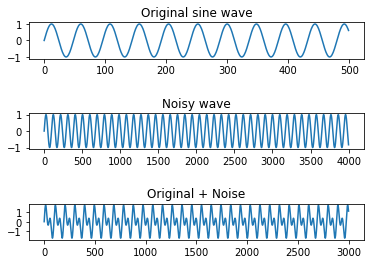

In [24]:
plt.subplot(3,1,1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace= 1.5)
plt.plot(sine_wave[:500])

plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(sine_noise[:4000])

plt.subplot(3,1,3)
plt.title("Original + Noise")
plt.plot(combined_signal[:3000])
plt.show()

(0.0, 1200.0)

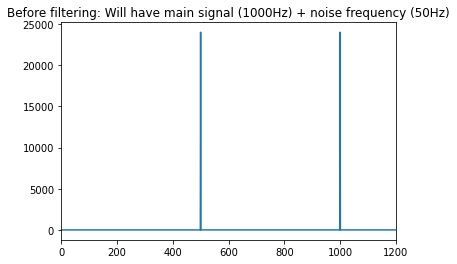

In [25]:
data_fft = np.fft.fft(combined_signal)  #data_fft contains the fft of the combined noise+signal wave. freq contains the absolute of the frequencies found in it.
freq = (np.abs(data_fft[:len(data_fft)]))

plt.plot(freq)
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
plt.xlim(0,1200)

#We take the fft of the signal, as before, and plot it. 

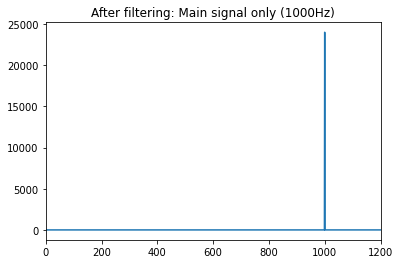

In [26]:
#Filter between lower and upper limits.
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]  
plt.plot(filtered_freq)
plt.title("After filtering: Main signal only (1000Hz)")
plt.xlim(0,1200)
plt.show()
plt.close()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


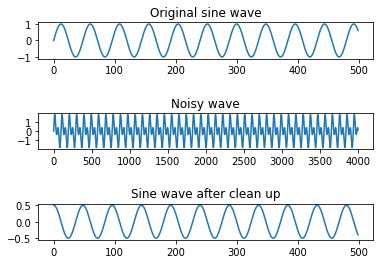

In [27]:
#Now take the ifft, which stands for Inverse FFT. This takes our signal and convert it back to time domain. 
recovered_signal = np.fft.ifft(filtered_freq)

plt.subplot(3,1,1)
plt.title("Original sine wave")
plt.subplots_adjust(hspace=1.5)
plt.plot(sine_wave[:500])

plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(combined_signal[:4000])

plt.subplot(3,1,3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[:500]))

plt.show()